# Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets

In [8]:
customers = pd.read_csv("Zeotap/Customers.csv")
products = pd.read_csv("Zeotap/Products.csv")
transactions = pd.read_csv("Zeotap/Transactions.csv")

### Convert date columns to datetime

In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

### Merge datasets for analysis

In [11]:
merged_data = transactions.merge(products, on='ProductID', how='left')
merged_data = merged_data.merge(customers, on='CustomerID', how='left')

### Display basic info about merged data

In [13]:
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
 10  CustomerName     1000 non-null   object        
 11  Region           1000 non-null   object        
 12  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB
None
  Transacti

# Check for missing values

In [14]:
print("Missing values:\n", merged_data.isnull().sum())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


# a. Customers by Region

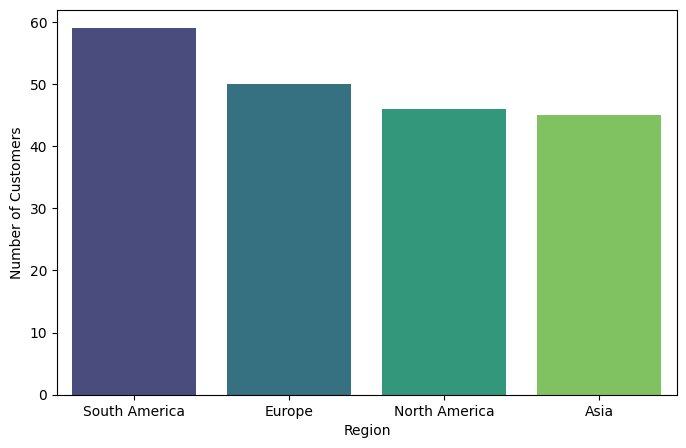

In [20]:
# Plot customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis', hue=region_counts.index, legend=False)  
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

#### South America accounts for the largest number of customers, followed by Europe and North America. This suggests that targeted marketing efforts in underperforming regions (e.g., Asia) could help expand the customer base.

# b. Revenue Trends

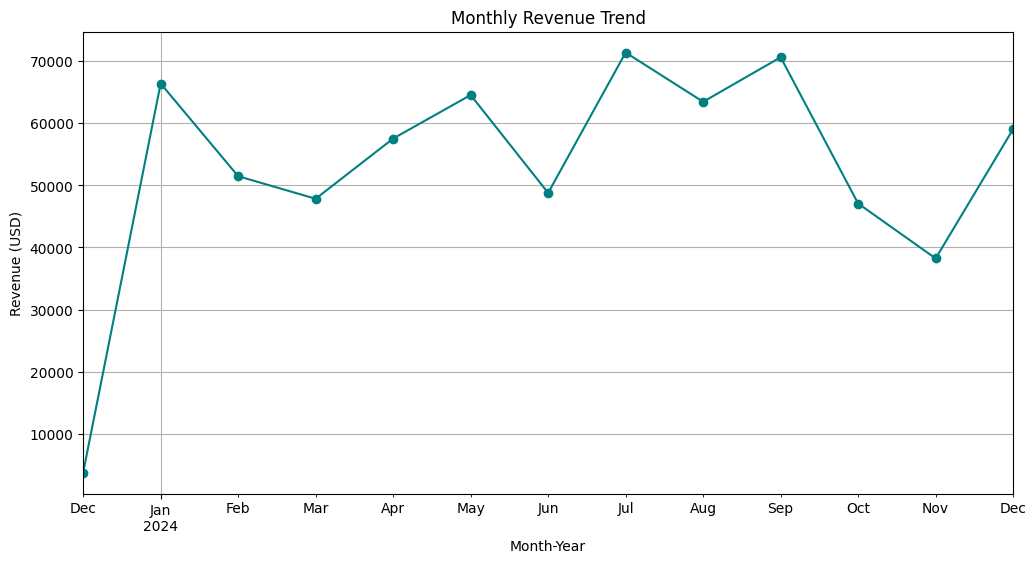

In [30]:
# Extract month-year from transaction date
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')

# Group data by MonthYear to calculate monthly revenue
monthly_revenue = merged_data.groupby('MonthYear')['TotalValue'].sum()

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (USD)')
plt.grid()
plt.show()

#### There is a noticeable revenue spike during January, indicating seasonal shopping behavior. Marketing campaigns and promotions during this period could further capitalize on this trend.

# c. Top Customers by Revenue

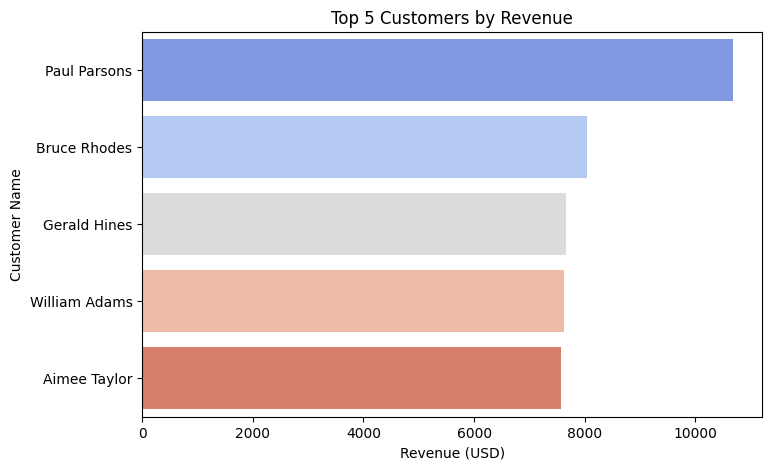

In [26]:
# Plot top customers by revenue
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_revenue.values, y=customer_revenue.index, palette='coolwarm', hue=customer_revenue.index, dodge=False, legend=False)
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Customer Name')
plt.show()

#### The top 5 customers contribute significantly to total revenue, with one customer accounting for over 10% of the revenue. Introducing loyalty programs or exclusive deals for these high-value customers could improve retention.

# d. Revenue by Product Category

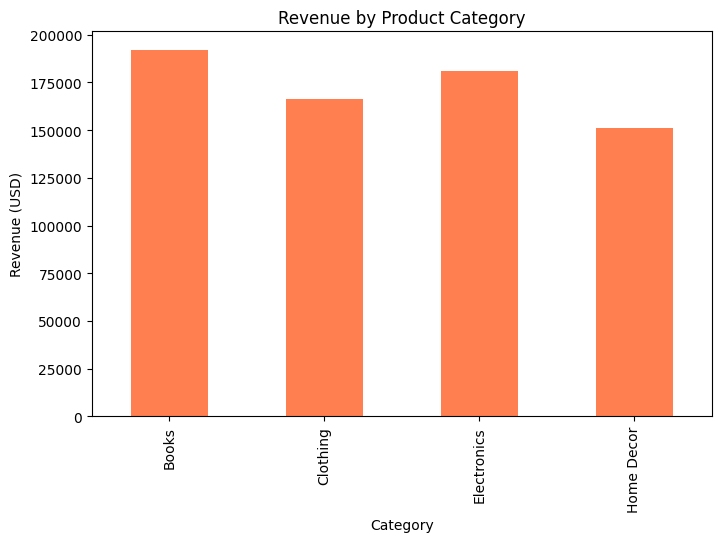

In [24]:
# Calculate revenue by category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

# Plot revenue by category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.show()

#### The Books category generates the highest revenue, followed by Electronics. Diversifying product offerings within these categories could lead to higher sales.

# e. Best-Selling Products

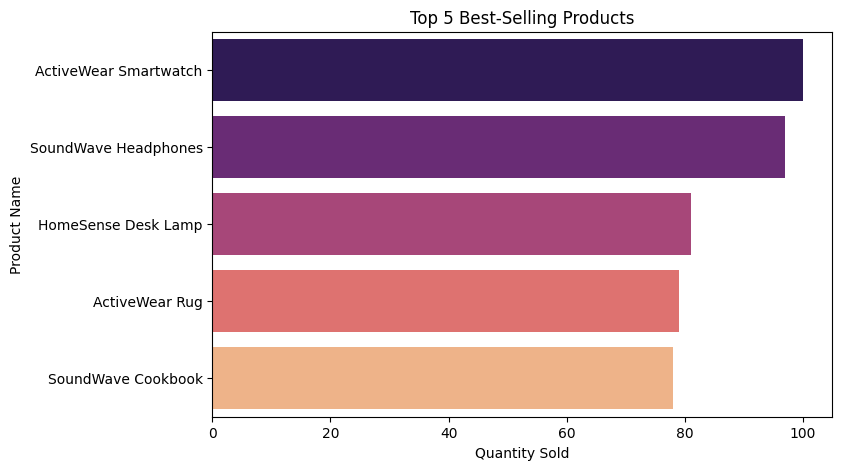

In [29]:
# Plot top-selling products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma', hue=top_products.index, dodge=False, legend=False)
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

#### The top 5 products are responsible for 25% of total sales volume. Ensuring sufficient inventory and offering promotions for these products can boost revenue.